In [13]:
# 전처리용
import os
import pandas as pd

#https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html
# china = pd.read_excel(xlsx_path + "/BeiJingPrices.xlsx")
cwd = os.getcwd()
cwd

'/Users/miki/Desktop/대학:study/kaggle/codes'

In [14]:
china_folder = "/Users/miki/Desktop/대학:study/kaggle/input/china_price/"
china_excel = os.path.join(china_folder, "BeiJingPrices.xlsx")
beijing = pd.read_excel(china_excel)
beijing
# pip3 install openpyxl

,room,hall,bathroom,area(m²),direction,height,built,district,location,price(10k Yuan),price(Yuan/m²)
0,2,1,1,102.0,南北,高层(共6层),2005.0,昌平,回龙观,565.0,55393
1,2,1,1,85.6,南北,高层(共15层),2005.0,丰台,石榴庄,679.0,79341
2,3,2,2,139.0,南,中层(共32层),2008.0,朝阳,望京,1290.0,92806
3,2,2,1,93.0,南,中层(共16层),2010.0,平谷,平谷城区,249.0,26775
4,1,1,1,24.0,南,共1层,2001.0,西城,官园,360.0,150000
...,...,...,...,...,...,...,...,...,...,...,...
2995,2,1,1,56.3,南北,高层(共6层),1992.0,丰台,方庄,365.0,64832
2996,1,1,1,49.1,南,中层(共17层),2017.0,丰台,长辛店,163.0,33198
2997,4,2,3,270.2,南北,中层(共35层),2004.0,朝阳,酒仙桥,2380.0,88096
2998,2,1,1,75.1,南北,低层(共6层),2005.0,密云,密云城区,203.0,27035


In [15]:
beijing.describe()

,room,hall,bathroom,area(m²),built,price(10k Yuan),price(Yuan/m²)
count,3000.000000,3000.000000,3000.000000,3000.000000,2648.000000,3000.000000,3000.000000
mean,2.726000,1.696667,1.836667,150.931167,2006.048338,1008.811357,61077.129000
std,1.213019,0.856874,1.267487,155.057335,8.498446,1428.760606,35549.703308
min,1.000000,0.000000,0.000000,10.000000,1955.000000,20.000000,2667.000000
25%,2.000000,1.000000,1.000000,76.675000,2002.000000,288.000000,32834.000000
50%,2.000000,2.000000,1.000000,96.000000,2007.000000,548.000000,51765.000000
75%,3.000000,2.000000,2.000000,162.000000,2013.000000,1190.000000,82048.000000
max,10.000000,8.000000,8.000000,2323.000000,2022.000000,20000.000000,179893.000000


In [16]:
beijing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   room             3000 non-null   int64  
 1   hall             3000 non-null   int64  
 2   bathroom         3000 non-null   int64  
 3   area(m²)         3000 non-null   float64
 4   direction        3000 non-null   object 
 5   height           2789 non-null   object 
 6   built            2648 non-null   float64
 7   district         3000 non-null   object 
 8   location         3000 non-null   object 
 9   price(10k Yuan)  3000 non-null   float64
 10  price(Yuan/m²)   3000 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 257.9+ KB


array([[<AxesSubplot:title={'center':'room'}>,
        <AxesSubplot:title={'center':'hall'}>,
        <AxesSubplot:title={'center':'bathroom'}>],
       [<AxesSubplot:title={'center':'area(m²)'}>,
        <AxesSubplot:title={'center':'built'}>,
        <AxesSubplot:title={'center':'price(10k Yuan)'}>],
       [<AxesSubplot:title={'center':'price(Yuan/m²)'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

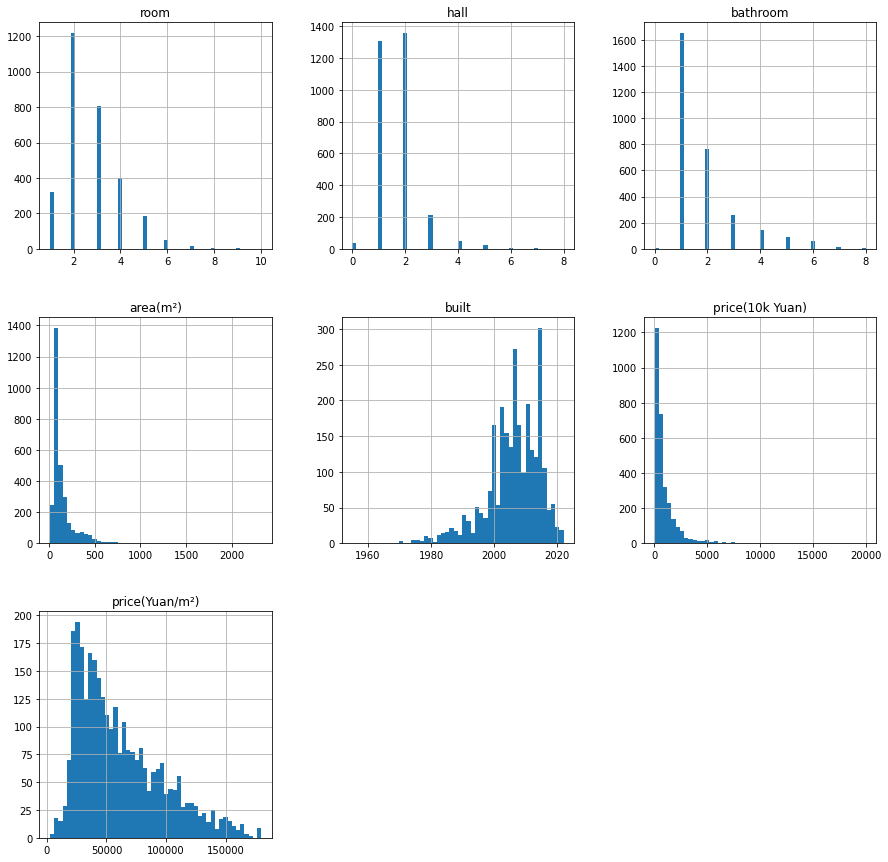

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
beijing.hist(bins=50, figsize=(15,15))

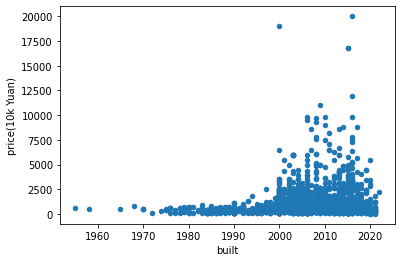

In [20]:
beijing_copy = beijing.copy()
beijing_copy.plot(kind="scatter", x = "built", y = "price(10k Yuan)")
plt.show()

In [21]:
corr_matrix = beijing_copy.corr()
corr_matrix["price(10k Yuan)"].sort_values(ascending=0)

price(10k Yuan)    1.000000
area(m²)           0.794630
bathroom           0.682408
room               0.574170
price(Yuan/m²)     0.537108
hall               0.468670
built              0.148392
Name: price(10k Yuan), dtype: float64

array([[<AxesSubplot:xlabel='price(10k Yuan)', ylabel='price(10k Yuan)'>,
        <AxesSubplot:xlabel='area(m²)', ylabel='price(10k Yuan)'>,
        <AxesSubplot:xlabel='bathroom', ylabel='price(10k Yuan)'>],
       [<AxesSubplot:xlabel='price(10k Yuan)', ylabel='area(m²)'>,
        <AxesSubplot:xlabel='area(m²)', ylabel='area(m²)'>,
        <AxesSubplot:xlabel='bathroom', ylabel='area(m²)'>],
       [<AxesSubplot:xlabel='price(10k Yuan)', ylabel='bathroom'>,
        <AxesSubplot:xlabel='area(m²)', ylabel='bathroom'>,
        <AxesSubplot:xlabel='bathroom', ylabel='bathroom'>]], dtype=object)

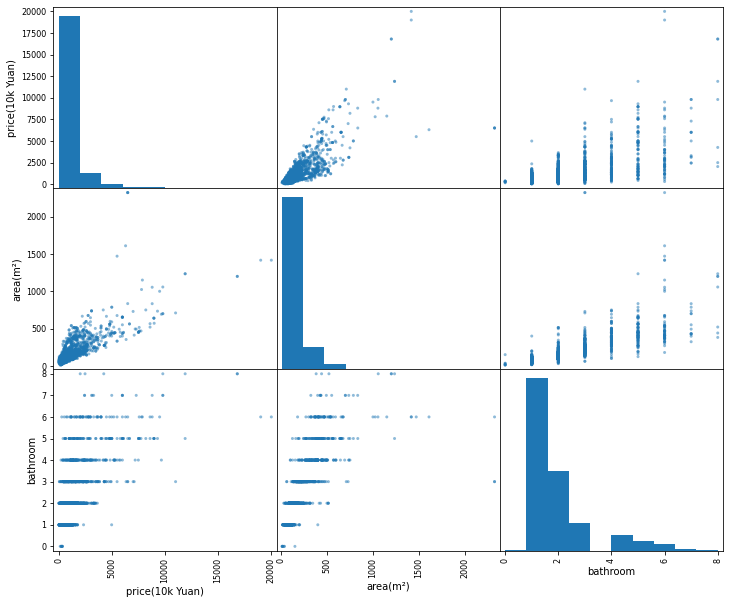

In [23]:
from pandas.plotting import scatter_matrix

attributes = ["price(10k Yuan)", "area(m²)", "bathroom"] # 이 세개를 3*3으로 보여줌
scatter_matrix(beijing_copy[attributes], figsize=(12,10))

In [ ]:
# 상관관계가 높은 컬럼이 많아 예측은 잘될 것 같은데, 기본적으로 데이터가 너무 적네..